# Tutorial for main cmipaccess functionnality

cmipaccess contains three main submodules to easily access CMIP5 and CMIP6 data.
- cmipaccess.esgf to access data online through esgf directly
- cmipaccess.spiritx to access data on spiritx cluster
- cmipaccess.local to download and manage global time series locally.

In [2]:
import cmipaccess as cmip

## 1. cmipaccess.esgf
### - get html links to access CMIP5 and CMIP6 data on esgf

In [3]:
# Find link to a given experiment/model/realisation/variable. Works for both CMIP5 and CMIP6.
# This returns a list which can be used with xr.open_mfdataset to read the data

path_CMIP6 = cmip.esgf.get_path_CMIP_data('IPSL-CM6A-LR','historical','r1i1p1f1','thetao')
print("Paths CMIP6 example 1: ", path_CMIP6)

path_CMIP6 = cmip.esgf.get_path_CMIP_data('CESM2','abrupt-4xCO2','r1i1p1f1','tas')
print("Paths CMIP6 example 2 : ", path_CMIP6)

path_CMIP5 = cmip.esgf.get_path_CMIP_data('CNRM-CM5','1pctCO2','r1i1p1','rsut')
print("Paths CMIP5 example 1 : ", path_CMIP5)

Paths CMIP6 example 1:  ['http://aims3.llnl.gov/thredds/dodsC/css03_data/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/historical/r1i1p1f1/Omon/thetao/gn/v20180803/thetao_Omon_IPSL-CM6A-LR_historical_r1i1p1f1_gn_185001-194912.nc', 'http://aims3.llnl.gov/thredds/dodsC/css03_data/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/historical/r1i1p1f1/Omon/thetao/gn/v20180803/thetao_Omon_IPSL-CM6A-LR_historical_r1i1p1f1_gn_195001-201412.nc']
Paths CMIP6 example 2 :  ['http://esgf-data.ucar.edu/thredds/dodsC/esg_dataroot/CMIP6/CMIP/NCAR/CESM2/abrupt-4xCO2/r1i1p1f1/Amon/tas/gn/v20190927/tas_Amon_CESM2_abrupt-4xCO2_r1i1p1f1_gn_000101-015012.nc', 'http://esgf-data.ucar.edu/thredds/dodsC/esg_dataroot/CMIP6/CMIP/NCAR/CESM2/abrupt-4xCO2/r1i1p1f1/Amon/tas/gn/v20190927/tas_Amon_CESM2_abrupt-4xCO2_r1i1p1f1_gn_015101-019912.nc', 'http://esgf-data.ucar.edu/thredds/dodsC/esg_dataroot/CMIP6/CMIP/NCAR/CESM2/abrupt-4xCO2/r1i1p1f1/Amon/tas/gn/v20190927/tas_Amon_CESM2_abrupt-4xCO2_r1i1p1f1_gn_020001-024912.nc', 'http://esgf-data.ucar.edu/thredds

### - find available models for a given experiment or members for a given model and experiment

In [12]:
# Find available models for a given experiment or realisations for a given mode/experiment. Only works for CMIP6 at the moment

models_hist_volc = cmip.esgf.find_models_experiment('hist-volc')
print('Models for experiment hist-volc:', models_hist_volc)

realisations_hist_volc_miroc6 = cmip.esgf.find_realisations_experiment('MIROC6', 'hist-volc')
print('Realisations for MIROC6 hist-volc experiment:', realisations_hist_volc_miroc6)

Models for experiment hist-volc: ['CMCC-CM2-SR5', 'CanESM5', 'GISS-E2-1-G', 'HadGEM3-GC31-LL', 'MIROC6', 'MPI-ESM1-2-LR', 'MRI-ESM2-0']
Realisations for MIROC6 hist-volc experiment: ['r1i1p1f1', 'r2i1p1f1', 'r3i1p1f1', 'r4i1p1f1', 'r5i1p1f1', 'r6i1p1f1', 'r7i1p1f1', 'r8i1p1f1', 'r9i1p1f1', 'r10i1p1f1']


### - get html links for grid data (areacello/areacella)

In [6]:
# Get link to cell information variables. For now only possible with areacello and areacella. Multiple links are provided in case one is corrupted.

area_path = cmip.esgf.get_path_cell('CESM2','areacello', 'gn')
print('Areacello path :', area_path)

Areacello path : ['http://aims3.llnl.gov/thredds/dodsC/css03_data/CMIP6/CMIP/NCAR/CESM2/piControl/r1i1p1f1/Ofx/areacello/gn/v20190320/areacello_Ofx_CESM2_piControl_r1i1p1f1_gn.nc', 'http://esgf-data.ucar.edu/thredds/dodsC/esg_dataroot/CMIP6/CMIP/NCAR/CESM2/piControl/r1i1p1f1/Ofx/areacello/gn/v20190320/areacello_Ofx_CESM2_piControl_r1i1p1f1_gn.nc', 'http://esgf-data04.diasjp.net/thredds/dodsC/esg_dataroot/CMIP6/CMIP/NCAR/CESM2/piControl/r1i1p1f1/Ofx/areacello/gn/v20190320/areacello_Ofx_CESM2_piControl_r1i1p1f1_gn.nc']


## 2. cmipaccess.spiritx
Similarly to cmipaccess.esgf, but with links to data stored locally on spiritx.

### - get path to local datasets

In [7]:
# Find paths to a given experiment/model/realisation/variable. Works for both CMIP5 and CMIP6.
# This returns a list which can be used with xr.open_mfdataset to read the data

path_CMIP6 = cmip.spiritx.get_path_CMIP_data('IPSL-CM6A-LR','historical','r1i1p1f1','thetao')
print("Paths CMIP6 example 1: ", path_CMIP6)

path_CMIP6 = cmip.spiritx.get_path_CMIP_data('CESM2','abrupt-4xCO2','r1i1p1f1','tas')
print("Paths CMIP6 example 2 : ", path_CMIP6)

path_CMIP5 = cmip.spiritx.get_path_CMIP_data('CNRM-CM5','1pctCO2','r1i1p1','rsut')
print("Paths CMIP5 example 1 : ", path_CMIP5)

Paths CMIP6 example 1:  ['/bdd/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/historical/r1i1p1f1/Omon/thetao/gn/latest/thetao_Omon_IPSL-CM6A-LR_historical_r1i1p1f1_gn_185001-194912.nc', '/bdd/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/historical/r1i1p1f1/Omon/thetao/gn/latest/thetao_Omon_IPSL-CM6A-LR_historical_r1i1p1f1_gn_195001-201412.nc']
Paths CMIP6 example 2 :  ['/bdd/CMIP6/CMIP/NCAR/CESM2/abrupt-4xCO2/r1i1p1f1/Amon/tas/gn/latest/tas_Amon_CESM2_abrupt-4xCO2_r1i1p1f1_gn_070001-074912.nc', '/bdd/CMIP6/CMIP/NCAR/CESM2/abrupt-4xCO2/r1i1p1f1/Amon/tas/gn/latest/tas_Amon_CESM2_abrupt-4xCO2_r1i1p1f1_gn_040001-044912.nc', '/bdd/CMIP6/CMIP/NCAR/CESM2/abrupt-4xCO2/r1i1p1f1/Amon/tas/gn/latest/tas_Amon_CESM2_abrupt-4xCO2_r1i1p1f1_gn_090001-094912.nc', '/bdd/CMIP6/CMIP/NCAR/CESM2/abrupt-4xCO2/r1i1p1f1/Amon/tas/gn/latest/tas_Amon_CESM2_abrupt-4xCO2_r1i1p1f1_gn_080001-084912.nc', '/bdd/CMIP6/CMIP/NCAR/CESM2/abrupt-4xCO2/r1i1p1f1/Amon/tas/gn/latest/tas_Amon_CESM2_abrupt-4xCO2_r1i1p1f1_gn_050001-054912.nc', '/bdd/CMIP6/CMIP/NCAR

## 3. cmipaccess.local
Store locally global mean timeseries and access them easily. Also allows to get global timeseries with control drift removed

### !!! ATENTION !!!
Before using the cmipacces.local functionnality, configure a local directory where data will be stored by changing the `CUSTOM_DATA_DIR` variable in `cmipaccess/local/config.py`.

### - download global mean data

In [11]:
# Downloads one specific timeseries
cmip.local.download_single_timeseries('MIROC6','hist-volc','r1i1p1f1', 'tas', chunks=dict(time=120))

# Downloads all realisations for one model. You can specify mutiple variables at the end
cmip.local.download_all_realisations_one_model('MIROC6', 'hist-volc', 'tas','tos', chunks=dict(time=120))

# Downloads all models and all realisations available for one experiment
cmip.local.download_all_realisations_all_models('piSST-pxK', 'rsut', chunks=dict(time=120))


File already exists. Add overwrite=True, to overwrite it
  MIROC6 | hist-volc | Downloading 20 file(s) ...
File already exists. Add overwrite=True, to overwrite it
File already exists. Add overwrite=True, to overwrite it
File already exists. Add overwrite=True, to overwrite it
File already exists. Add overwrite=True, to overwrite it
File already exists. Add overwrite=True, to overwrite it
File already exists. Add overwrite=True, to overwrite it
File already exists. Add overwrite=True, to overwrite it
File already exists. Add overwrite=True, to overwrite it
File already exists. Add overwrite=True, to overwrite it
File already exists. Add overwrite=True, to overwrite it
File already exists. Add overwrite=True, to overwrite it
File already exists. Add overwrite=True, to overwrite it
File already exists. Add overwrite=True, to overwrite it
File already exists. Add overwrite=True, to overwrite it
File already exists. Add overwrite=True, to overwrite it
File already exists. Add overwrite=Tru

### - Access downloaded global mean data with the control drift removed

<xarray.Dataset> Size: 57kB
Dimensions:          (time: 2052)
Coordinates:
    height           float64 8B 2.0
  * time             (time) object 16kB 1850-01-16 12:00:00 ... 2020-12-16 12...
Data variables:
    control_extract  (time) float32 8kB 286.1 286.3 286.8 ... 288.4 287.1 286.3
    control_drift    (time) float64 16kB 288.4 288.4 288.4 ... 288.3 288.3 288.3
    detrended_data   (time) float64 16kB -2.33 -2.135 -1.375 ... -1.148 -2.023
Attributes: (12/45)
    Conventions:                     CF-1.7 CMIP-6.2
    activity_id:                     DAMIP
    branch_method:                   standard
    branch_time_in_child:            0.0
    branch_time_in_parent:           0.0
    creation_date:                   2019-11-07T02:55:18Z
    ...                              ...
    variable_id:                     tas
    variant_label:                   r1i1p1f1
    license:                         CMIP6 model data produced by MIROC is li...
    cmor_version:                    3.4.0
    tracking_id:                     hdl:21.14100/a6032311-5ca0-4649-b4b7-30f...
    DODS_EXTRA.Unlimited_Dimension:  time

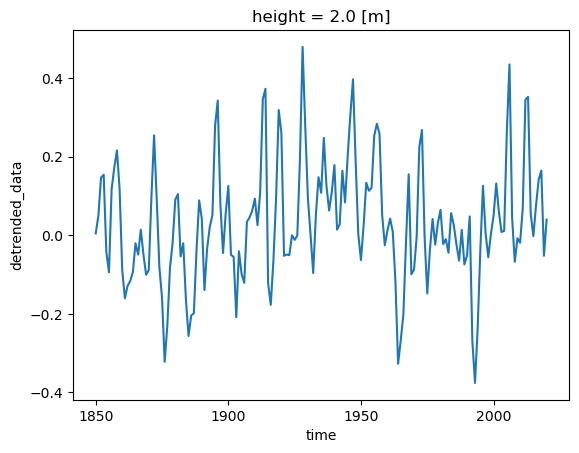

In [34]:
# Load one timeseries
ds = cmip.local.get_detrended_global_time_series('MIROC6','hist-volc','r1i1p1f1', 'tas')
ds.detrended_data.resample(time='YS').mean().plot()
ds

100%|██████████| 10/10 [00:00<00:00, 23.14it/s]


<xarray.Dataset> Size: 181kB
Dimensions:           (time: 2052, realisation: 10)
Coordinates:
  * time              (time) datetime64[ns] 16kB 1850-01-01 ... 2020-12-01
    height            float64 8B 2.0
  * realisation       (realisation) <U9 360B 'r1i1p1f1' ... 'r10i1p1f1'
Data variables:
    tas               (realisation, time) float64 164kB -2.33 -2.135 ... -1.984
    control_years     (realisation) float64 80B 171.0 171.0 ... 171.0 171.0
    tas_control_mean  (realisation) float64 80B 288.4 288.4 ... 288.4 288.4
Attributes: (12/45)
    Conventions:                     CF-1.7 CMIP-6.2
    activity_id:                     DAMIP
    branch_method:                   standard
    branch_time_in_child:            0.0
    branch_time_in_parent:           0.0
    creation_date:                   2019-11-07T02:55:18Z
    ...                              ...
    variable_id:                     tas
    variant_label:                   r1i1p1f1
    license:                         CMIP6 model data produced by MIROC is li...
    cmor_version:                    3.4.0
    tracking_id:                     hdl:21.14100/a6032311-5ca0-4649-b4b7-30f...
    DODS_EXTRA.Unlimited_Dimension:  time

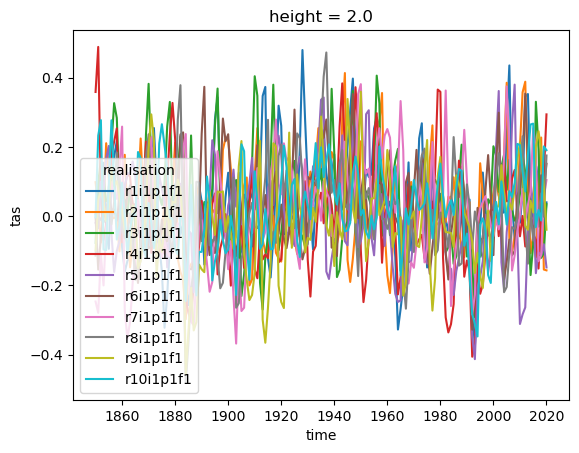

In [33]:
# Load multiple time series of the same variable
ds = cmip.local.get_all_detrended_global_time_series('MIROC6','hist-volc','tas')
ds.tas.resample(time='YS').mean().plot(hue='realisation')
ds

100%|██████████| 2/2 [00:00<00:00,  2.37it/s]


<xarray.Dataset> Size: 345kB
Dimensions:      (realisation: 10, time: 2052)
Coordinates:
  * time         (time) datetime64[ns] 16kB 1850-01-01 1850-02-01 ... 2020-12-01
    height       float64 8B 2.0
  * realisation  (realisation) <U9 360B 'r1i1p1f1' 'r2i1p1f1' ... 'r10i1p1f1'
Data variables:
    tas          (realisation, time) float64 164kB -2.33 -2.135 ... -1.15 -1.984
    tos          (realisation, time) float64 164kB 0.03349 0.2236 ... -0.1899
Attributes: (12/45)
    Conventions:                     CF-1.7 CMIP-6.2
    activity_id:                     DAMIP
    branch_method:                   standard
    branch_time_in_child:            0.0
    branch_time_in_parent:           0.0
    creation_date:                   2019-11-07T02:55:18Z
    ...                              ...
    variable_id:                     tas
    variant_label:                   r1i1p1f1
    license:                         CMIP6 model data produced by MIROC is li...
    cmor_version:                    3.4.0
    tracking_id:                     hdl:21.14100/a6032311-5ca0-4649-b4b7-30f...
    DODS_EXTRA.Unlimited_Dimension:  time

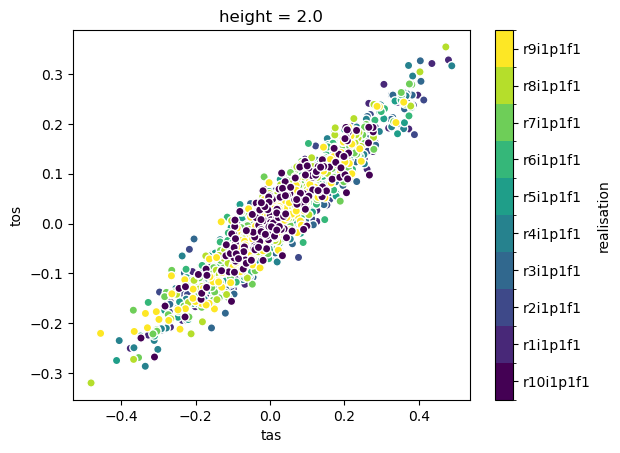

In [35]:
# Load multiple time series of multiple variables
ds = cmip.local.get_all_detrended_global_time_series_multivariable('MIROC6','hist-volc','tas','tos')
ds.resample(time='YS').mean().plot.scatter(x='tas', y='tos', hue='realisation')
ds

100%|██████████| 4/4 [00:01<00:00,  2.35it/s]


<xarray.Dataset> Size: 887kB
Dimensions:      (realisation: 11, time: 1980)
Coordinates:
  * time         (time) datetime64[ns] 16kB 1850-01-01 1850-02-01 ... 2014-12-01
  * realisation  (realisation) <U9 396B 'r1i1p1f1' 'r2i1p1f1' ... 'r11i1p1f1'
Data variables:
    tas          (realisation, time) float64 174kB -1.875 -1.618 ... -0.144
    rlut         (realisation, time) float64 174kB -2.103 -2.081 ... -3.448
    rsut         (realisation, time) float64 174kB 6.807 3.385 ... 3.582 6.99
    rsdt         (realisation, time) float64 174kB 11.14 8.124 ... 7.508 10.94
    eei          (realisation, time) float64 174kB 6.44 6.82 ... 6.193 7.393
Attributes: (12/45)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    case_id:                15
    cesm_casename:          b.e21.BHIST.f09_g17.CMIP6-historical.001
    contact:                cesm_cmip6@ucar.edu
    creation_date:          2019-01-16T23:34:05Z
    ...                     ...
    sub_experiment:         none
    sub_experiment_id:      none
    branch_time_in_parent:  219000.0
    branch_time_in_child:   674885.0
    branch_method:          standard
    further_info_url:       https://furtherinfo.es-doc.org/CMIP6.NCAR.CESM2.h...

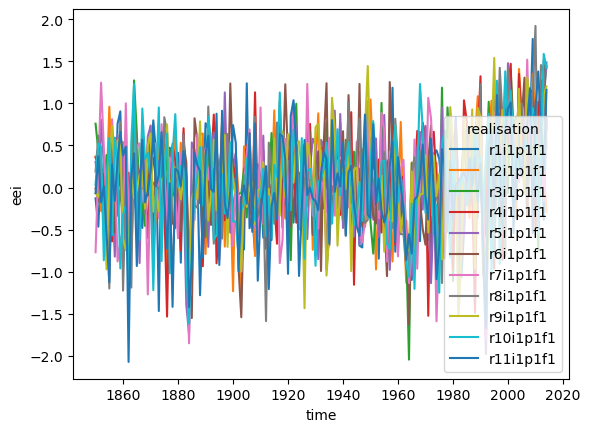

In [37]:
# Load TOA energy budget
ds = cmip.local.get_global_toa_energy_budget('CESM2','historical')
ds.resample(time='YS').mean().eei.plot(hue='realisation')
ds